`converting sensei matlab code to python.`

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
Vmax = 7           # Maximum gliding speed (um/s)
k = 300.0          # Spring constant (pN/um)
fstall = 9.2       # Stall force (pN)
frupt = 9.2        # Rupture force (pN)

Tau1 = 0.025               # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.
Tau2min = frupt/k/Vmax

In [8]:
ActiveMotorRatioTemp = np.arange(0.01,0.99,0.01)

In [14]:
Tau = Tau1/Tau2min
f = frupt/fstall
Gamma = np.divide(1.0,ActiveMotorRatioTemp) - 1.0

GammaCritical = ((1.0 + Tau)**2)/2.0/f/Tau
ActiveMotorRatioCritical = 1.0/(GammaCritical + 1.0)

print("Critical gamma =",GammaCritical,"Critical ActiveMotorRatio =",ActiveMotorRatioCritical)

Critical gamma = 3.9408799171842652 Critical ActiveMotorRatio = 0.2023930993590885


In [25]:
Counter = 0; ActiveMotorRatio = []; Vplus = []; Vminus = []
for I in range(np.size(Gamma)):
    if ActiveMotorRatioTemp[I] > ActiveMotorRatioCritical:
        Counter = Counter + 1
        ActiveMotorRatio.append( ActiveMotorRatioTemp[I] )
        Vplus.append( 0.5*Vmax/Tau*(Tau - 1.0 + np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f* np.multiply(Tau,Gamma[I]))) )
        Vminus.append( 0.5*Vmax/Tau*(Tau - 1.0 - np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f* np.multiply(Tau,Gamma[I]))) )
        
ActiveMotorRatio = np.array(ActiveMotorRatio)
Vplus = np.array(Vplus)
Vminus = np.array(Vminus)

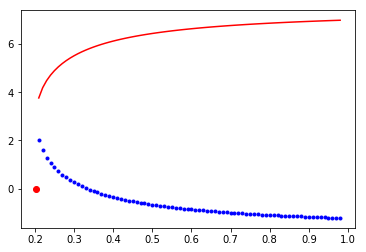

In [30]:
plt.plot(ActiveMotorRatio,Vplus,'r-',ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')